<a href="https://colab.research.google.com/github/pandyaharsh/Kaggle-Competition-Regression-Techniques/blob/main/Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#kaggle Competition

## House Prices: Advanced Regression Techniques

https://www.kaggle.com/c/house-prices-advanced-regression-techniques



###Competition description
#### Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

#### With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.



###Objective: To predict the final sale price of each house

### Given data
### We have been provided with in total 81 features in the dataset that includes varoius aspects of the house. The given data is of numerical as well as categorical type. 

## Loading required packages and mounting google drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn as sl
import statsmodels as sm
import seaborn as sns
import plotly.express as px


from scipy import stats
import matplotlib.pyplot as plt
import random as r
import plotly.express as px
import plotly.figure_factory as ff
from sklearn import metrics
import plotly.graph_objects as go
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import norm

pd.pandas.set_option('display.max_columns',None)
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from scipy.stats import norm, skew

### Loading Data

In [ ]:
dfTrain = pd.read_csv('/train.csv')
dfTest = pd.read_csv('test.csv' )
y_origional = pd.read_csv('sample_submission.csv')

In [ ]:
dfTrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
dfTest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
dfTrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
dfTest.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [ ]:
tr_id = dfTrain['Id']#Saving the Id column from train dataset which i will then remove
te_ID = dfTest['Id']#Saving the Id column from test dataset which i will then remove

In [ ]:
dfTrain.drop("Id", axis = 1, inplace = True)# Droping Id column as we do not need it 
dfTest.drop("Id", axis = 1, inplace = True)

In [ ]:
print(dfTrain.shape) #we have 80 columnsin the train data 
print(dfTest.shape) # we have 1 column less in test data which is our dependent variable saleprice

(1460, 80)
(1459, 79)


In [ ]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [ ]:
dfTrain = dfTrain.drop(dfTrain[(dfTrain['GrLivArea']>4000) & (dfTrain['SalePrice']<300000)].index)

## As one of my model is with Linear Regression, my data needs to be normaly distributed. So firstly checking the distribution of saleprice which we are predicting. 

In [ ]:
dfTrain['SalePrice'].describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).




 mu = 180932.92 and sigma = 79467.79



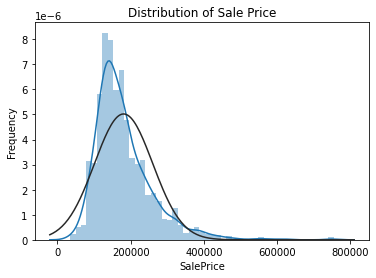

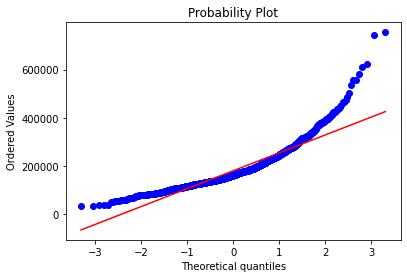

In [ ]:
sns.distplot(dfTrain['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(dfTrain['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')

fig = plt.figure()
res = stats.probplot(dfTrain['SalePrice'], plot=plt)
plt.show()

### From the distribution plot, it can bee seen that the sale price is right skwed. We need to make this distribution normal. Performing log transfrmation on it to make the distribution normal.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).




 mu = 12.02 and sigma = 0.40



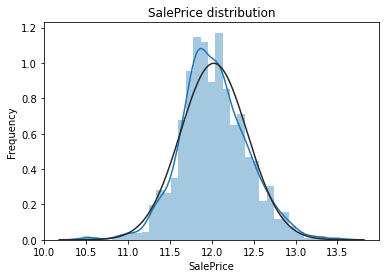

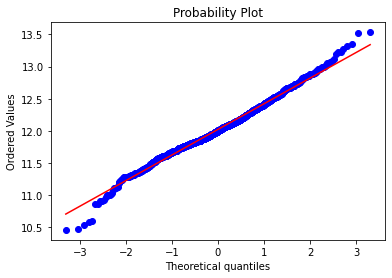

In [ ]:
dfTrain["SalePrice"] = np.log1p(dfTrain["SalePrice"])

sns.distplot(dfTrain['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(dfTrain['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.ylabel('Frequency')
plt.title('SalePrice distribution')
fig = plt.figure()
res = stats.probplot(dfTrain['SalePrice'], plot=plt)
plt.show()

## Checking the correlation of each feature with the dependent variable sale price which we are going to predict

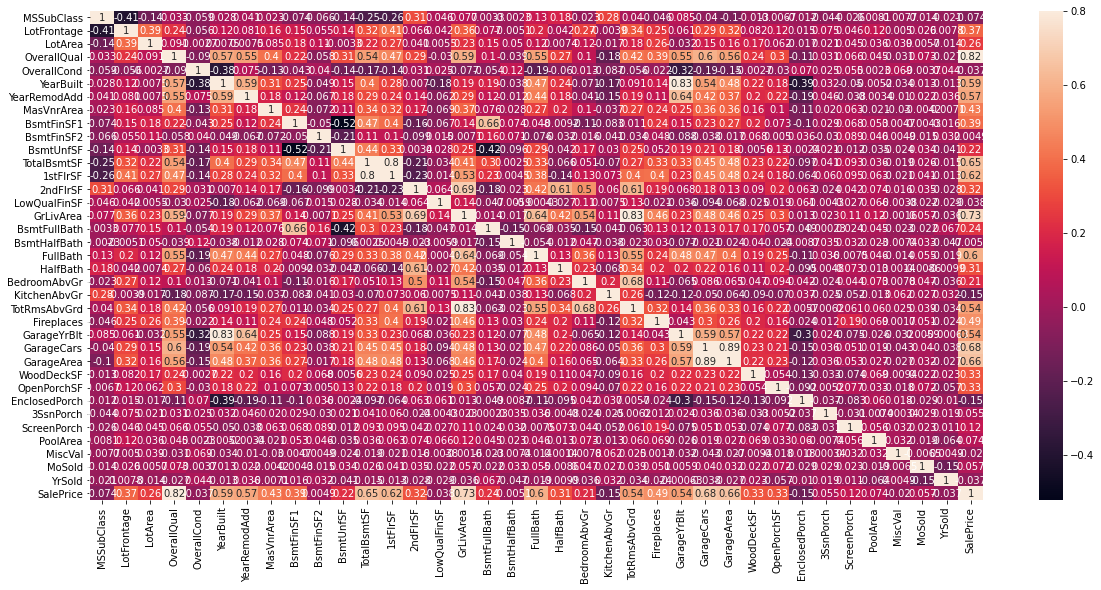

In [ ]:
correlation = dfTrain.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(correlation, vmax=.8, annot=True);

In [ ]:
#Below are the features that are having high correlation with our dependent variable SalePrice. 
highly_corr = dfTrain.corr()
highly_corr[(highly_corr['SalePrice']>0.5)].index

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [ ]:
#Features which are having weak correlation but not zero.
lowcorrelation = dfTrain.corr()
lowcorrelation[(lowcorrelation['SalePrice']<0.5) & (lowcorrelation['SalePrice']>0)].index

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'BedroomAbvGr',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MoSold'],
      dtype='object')

In [ ]:
#Features which have 0 or negative correlation
zeroornegcorrelation = dfTrain.corr()
zeroornegcorrelation[zeroornegcorrelation['SalePrice']<=0].index

Index(['MSSubClass', 'OverallCond', 'LowQualFinSF', 'BsmtHalfBath',
       'KitchenAbvGr', 'EnclosedPorch', 'MiscVal', 'YrSold'],
      dtype='object')

In [ ]:

numerical_features_train = dfTrain.select_dtypes(exclude = ["object"])#This will remove the data which has dataype of object
highly_corr_numerical = numerical_features_train.corr()
highly_corr_numerical[(highly_corr_numerical['SalePrice']>0.5)].index
for col in highly_corr_numerical:
  #sns.lmplot(x=col,y='SalePrice',data=numerical_features_train, height=4, aspect=2)

  fig = px.scatter(highly_corr_numerical, x=col, y="SalePrice")
  fig.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

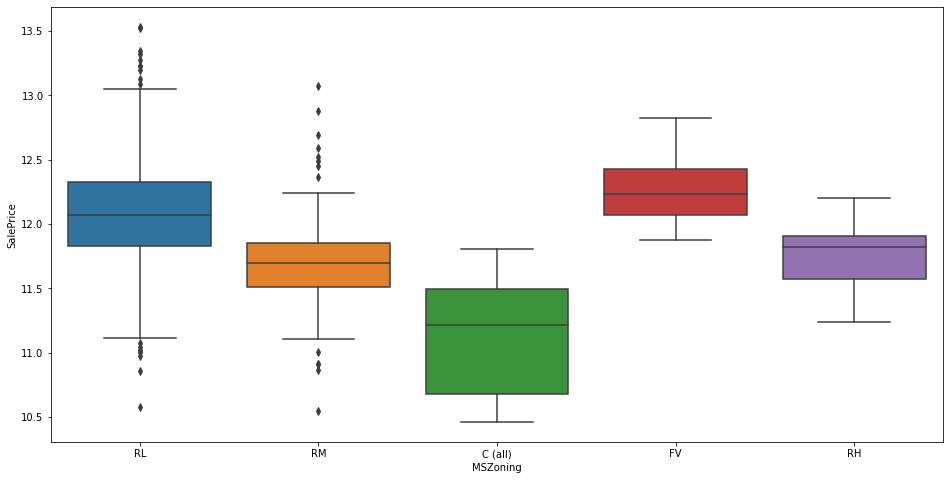

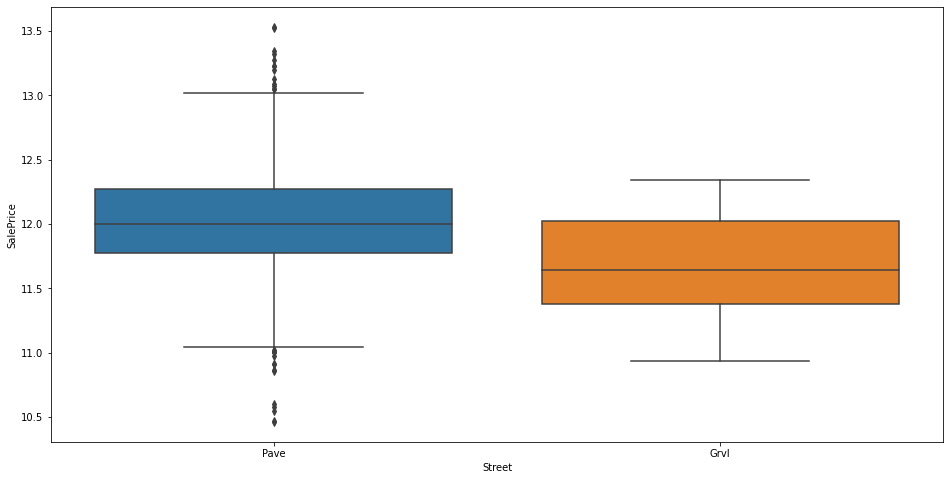

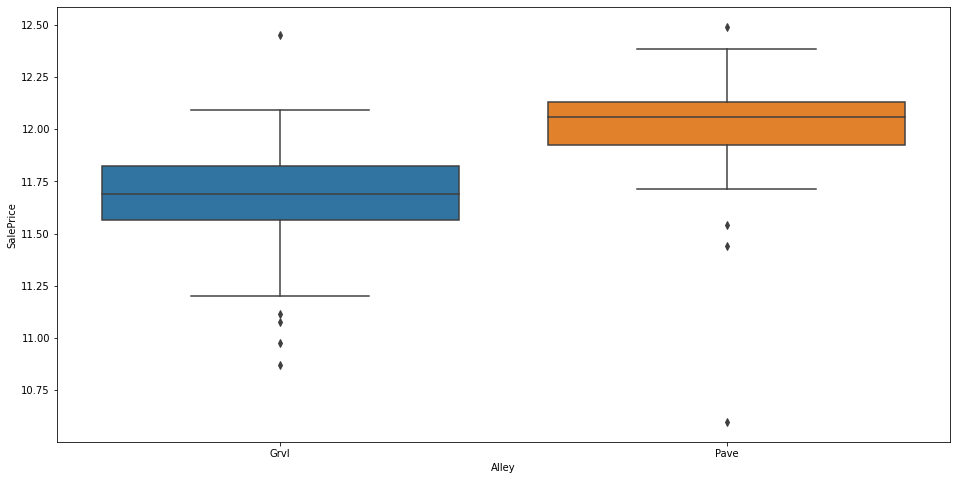

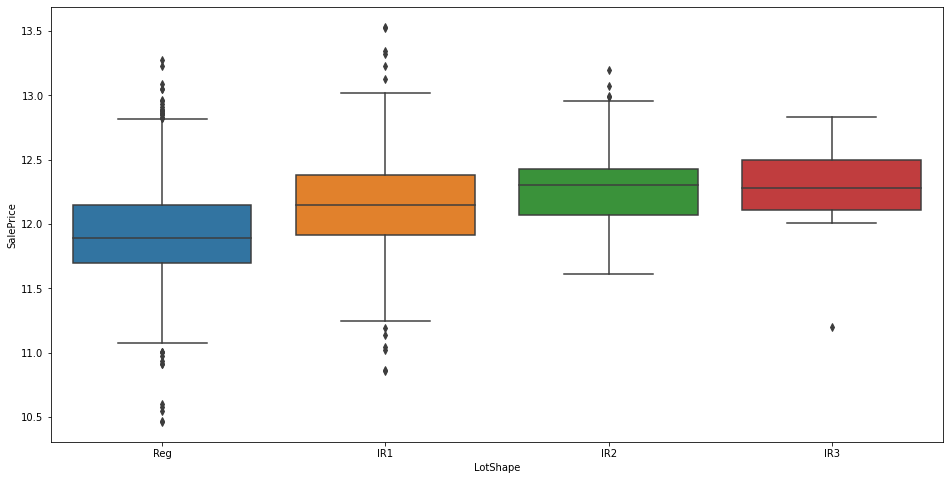

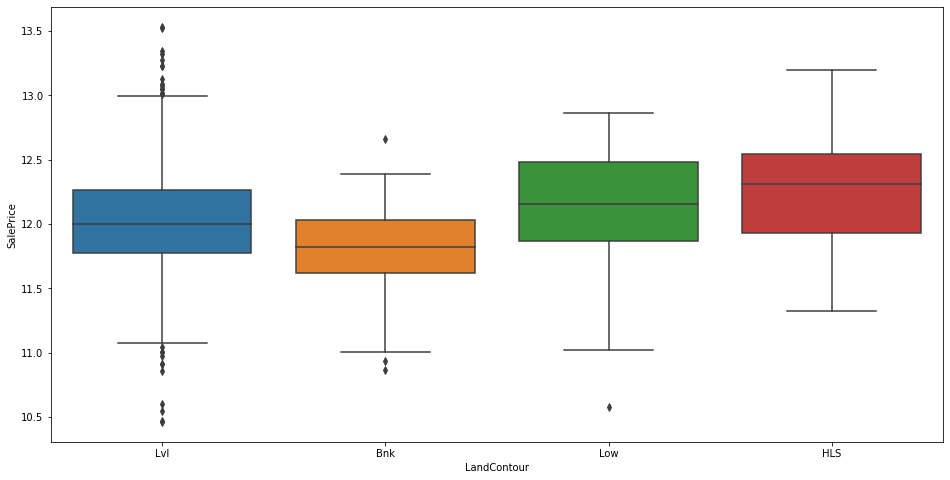

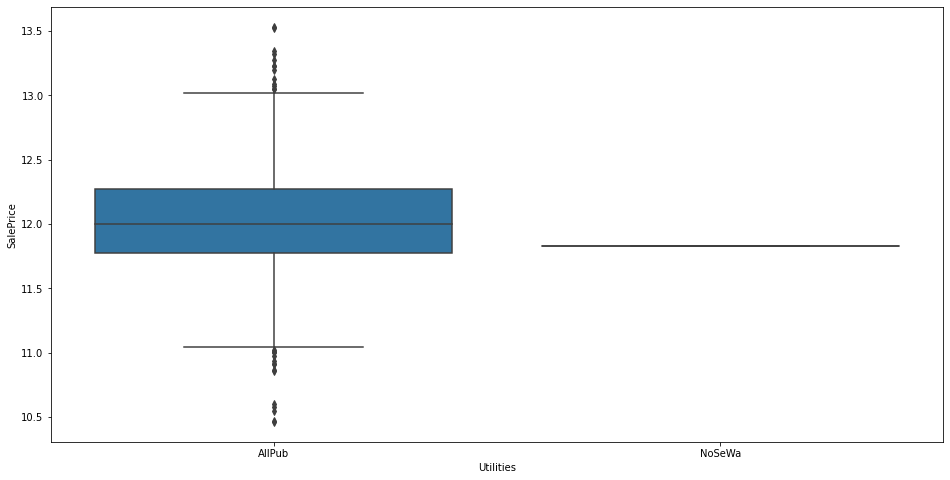

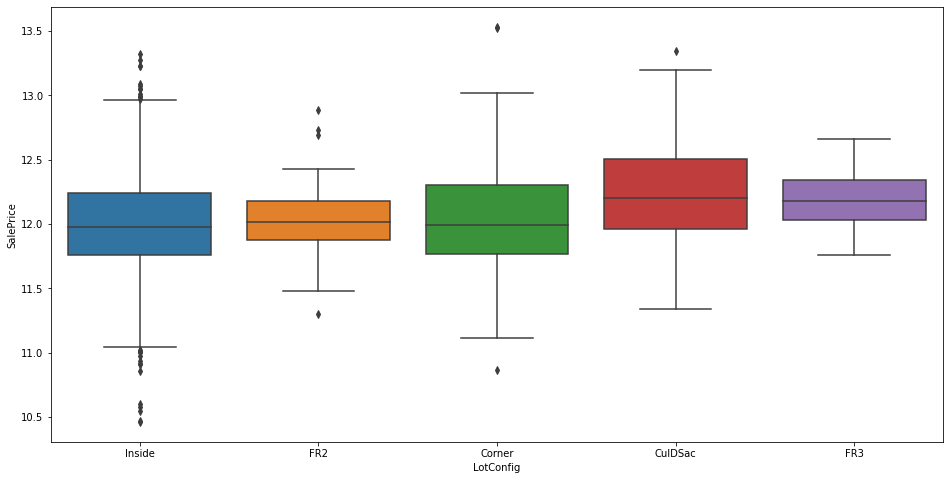

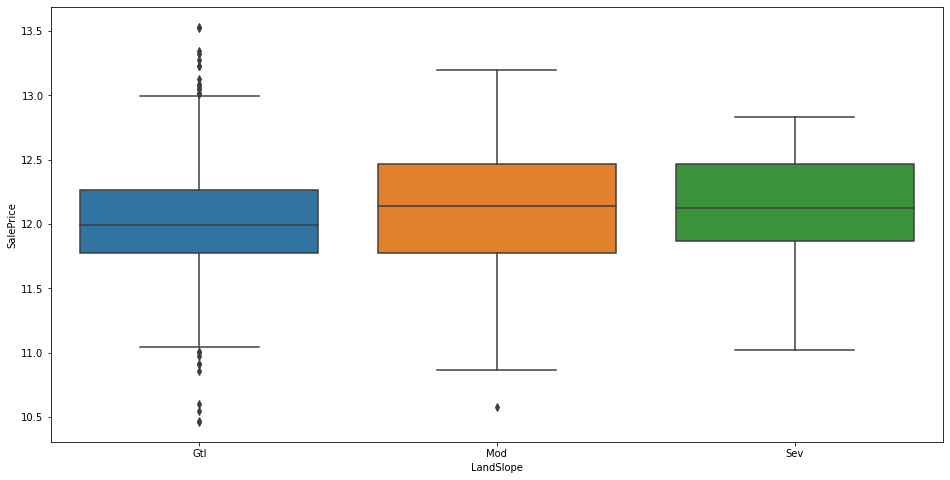

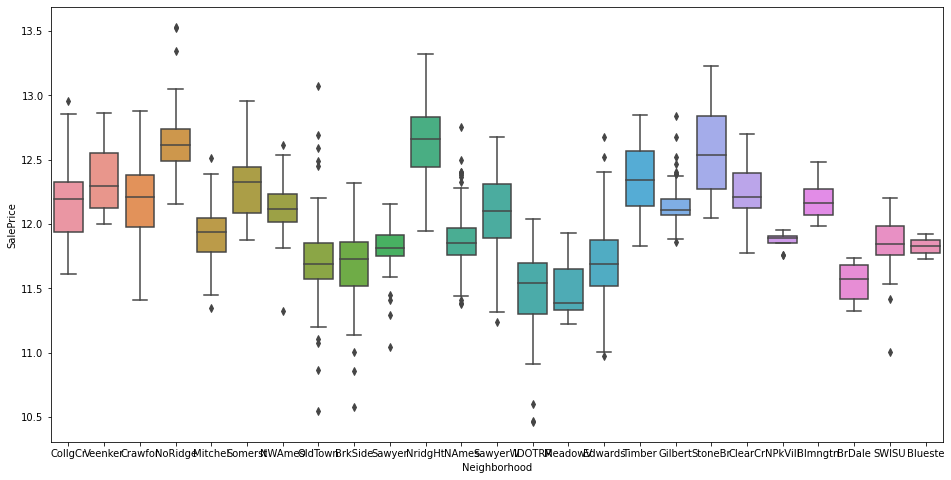

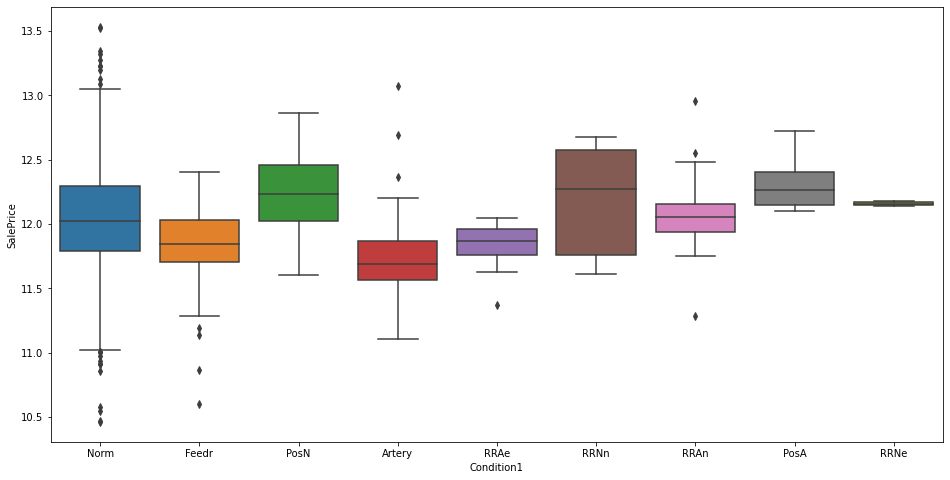

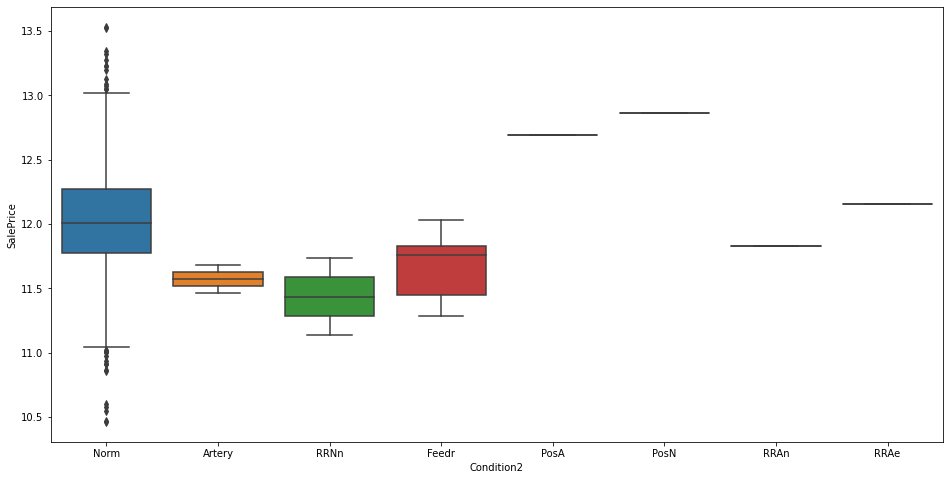

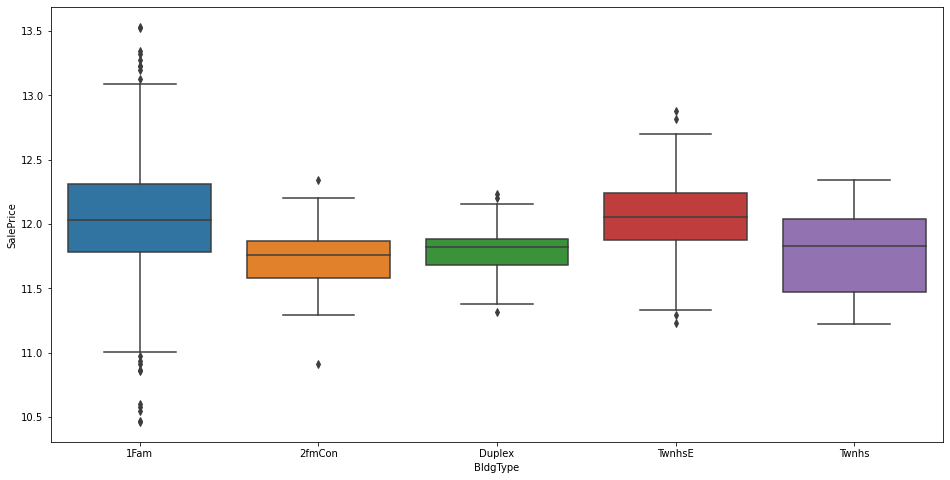

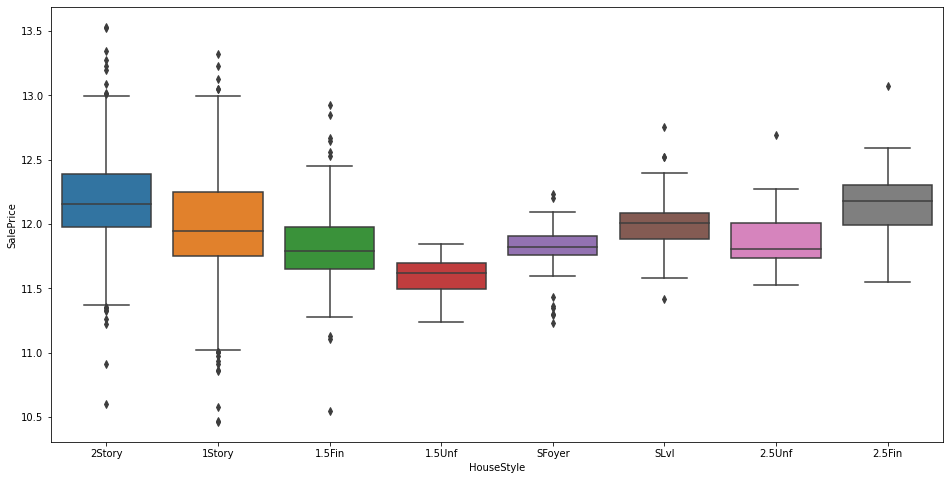

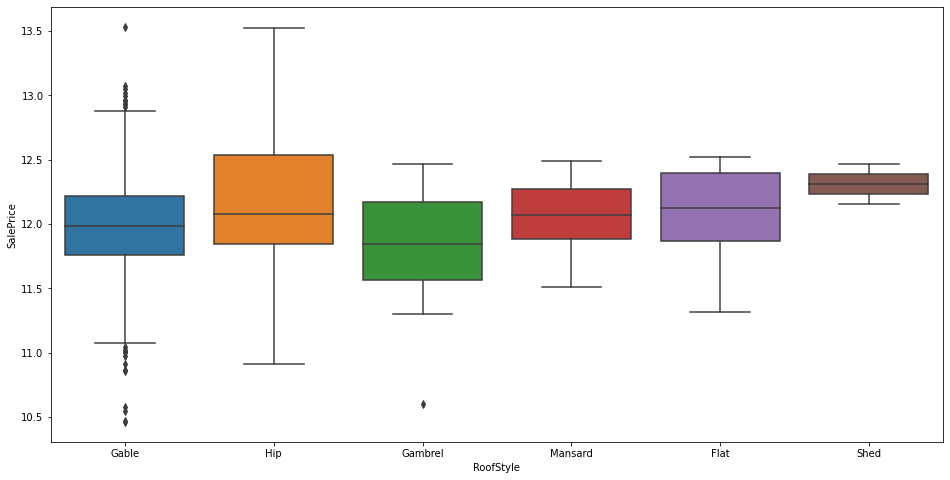

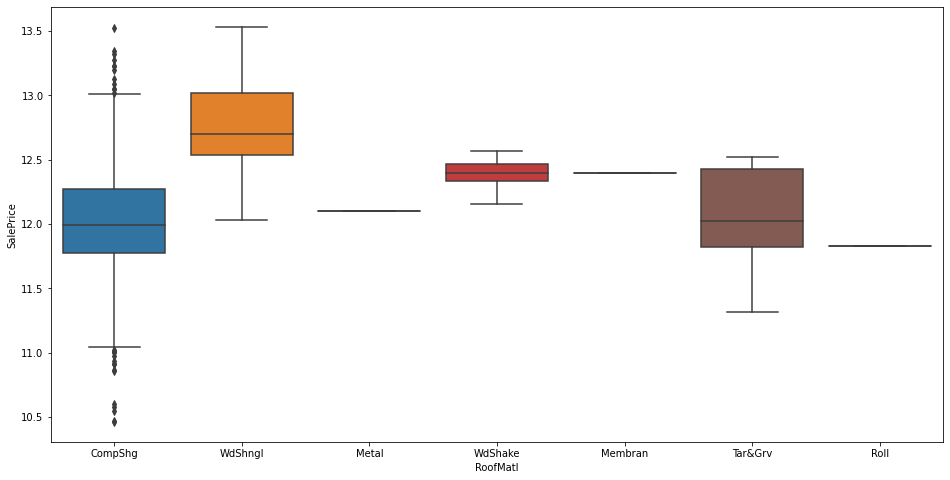

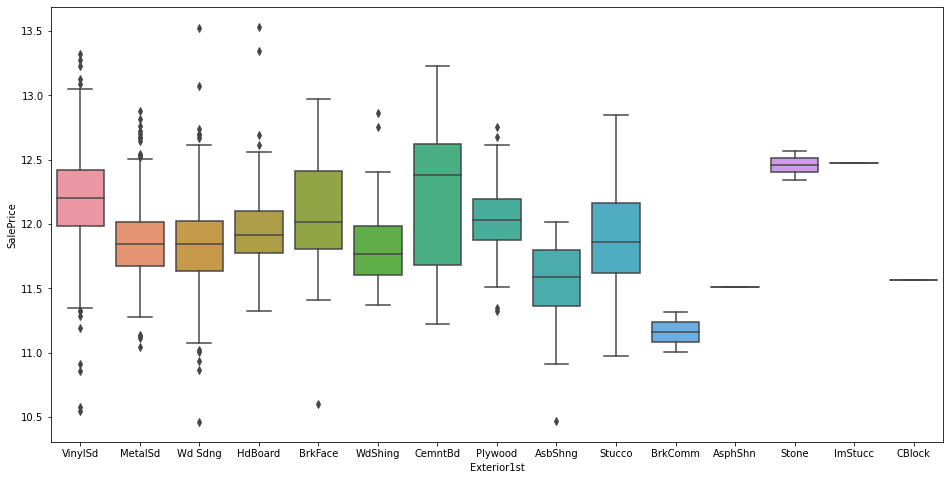

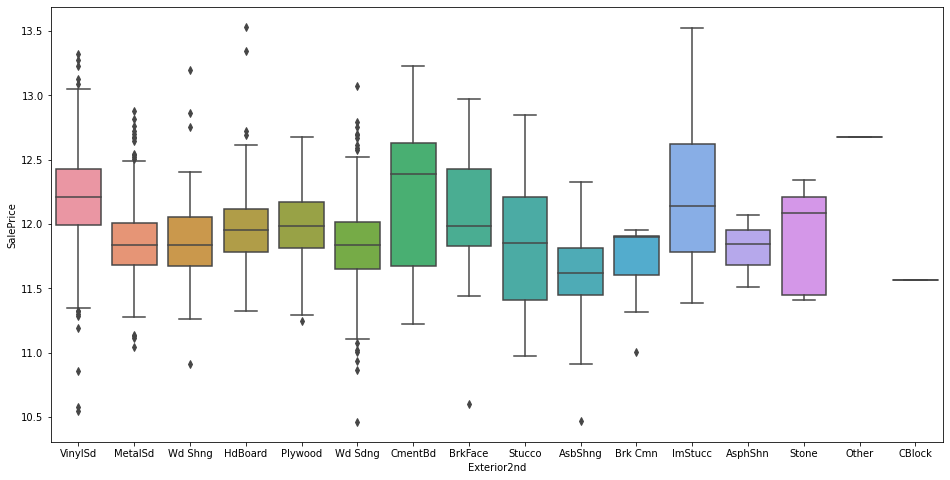

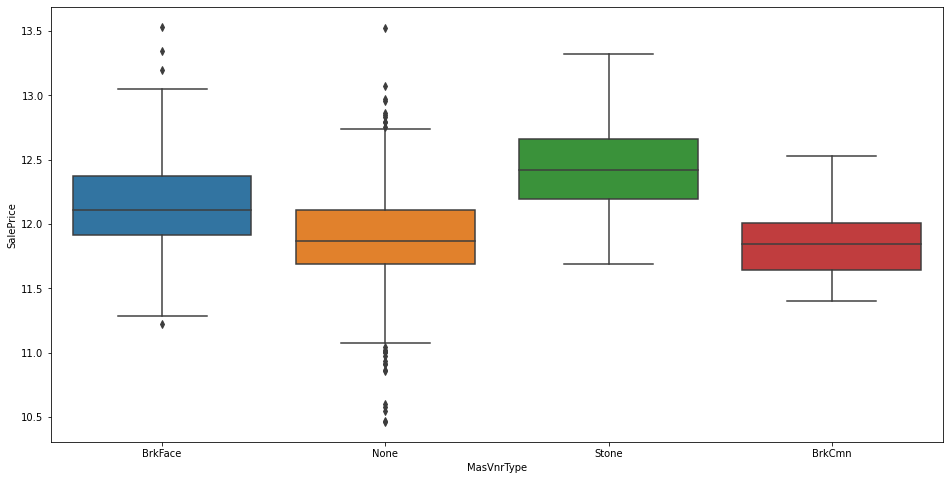

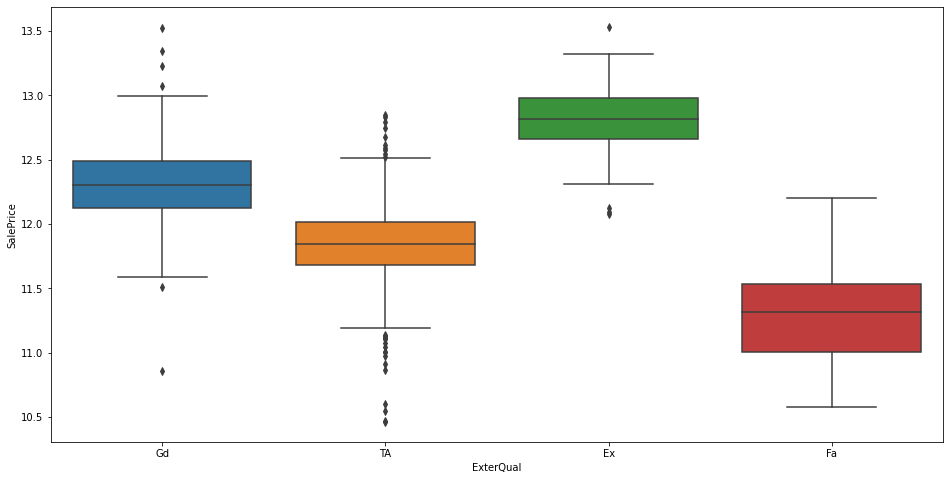

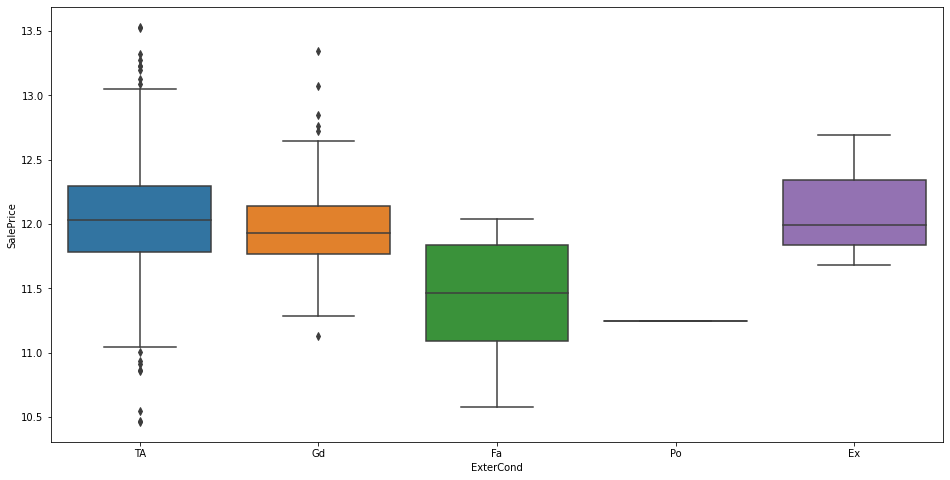

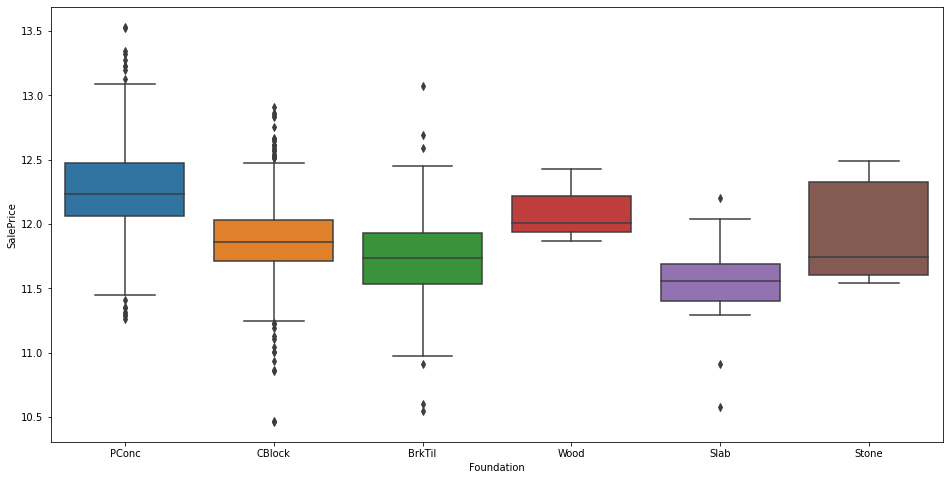

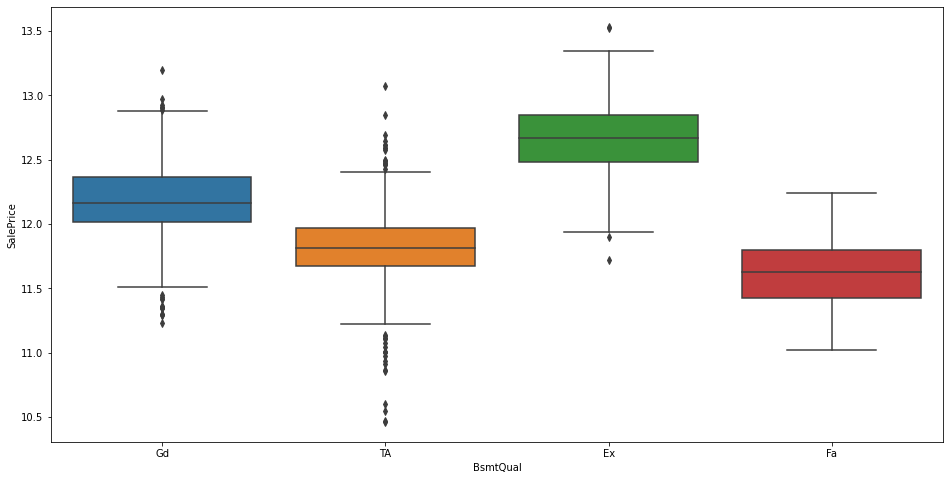

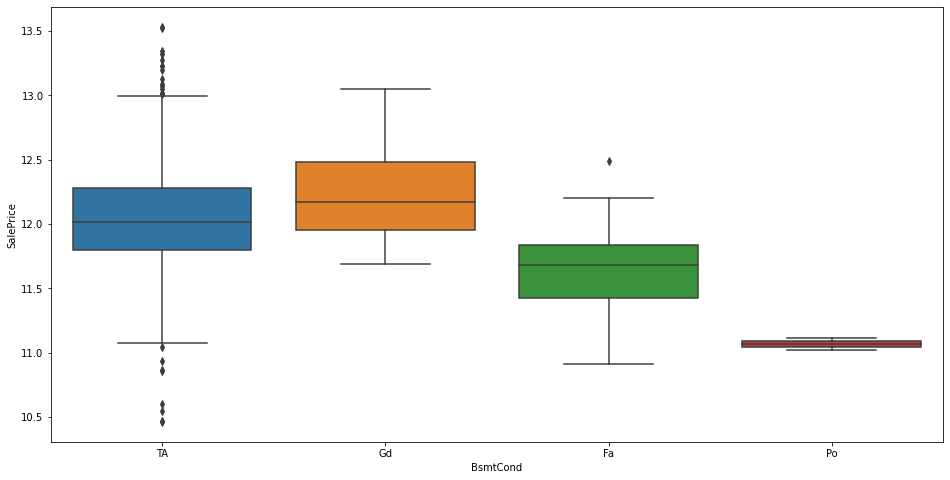

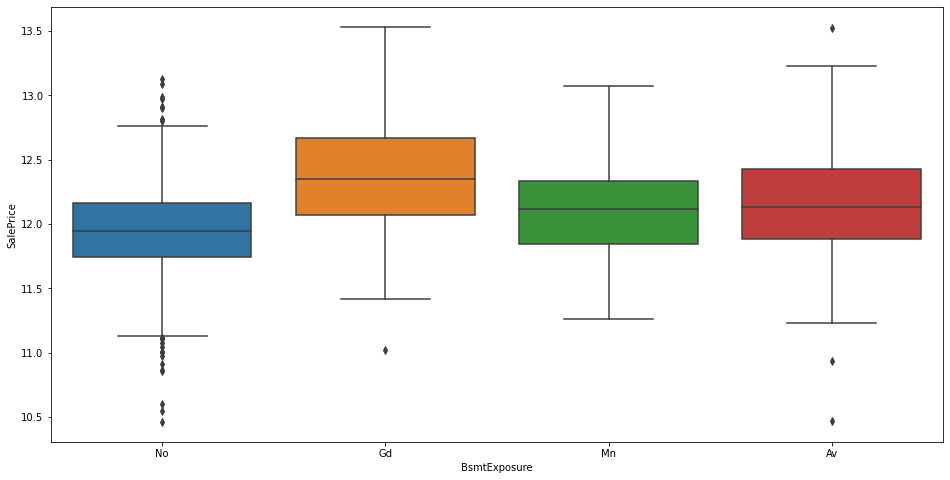

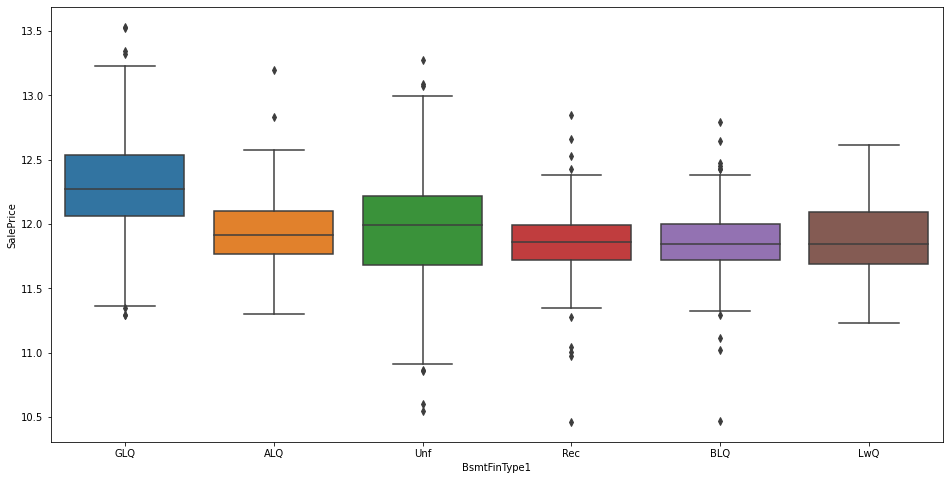

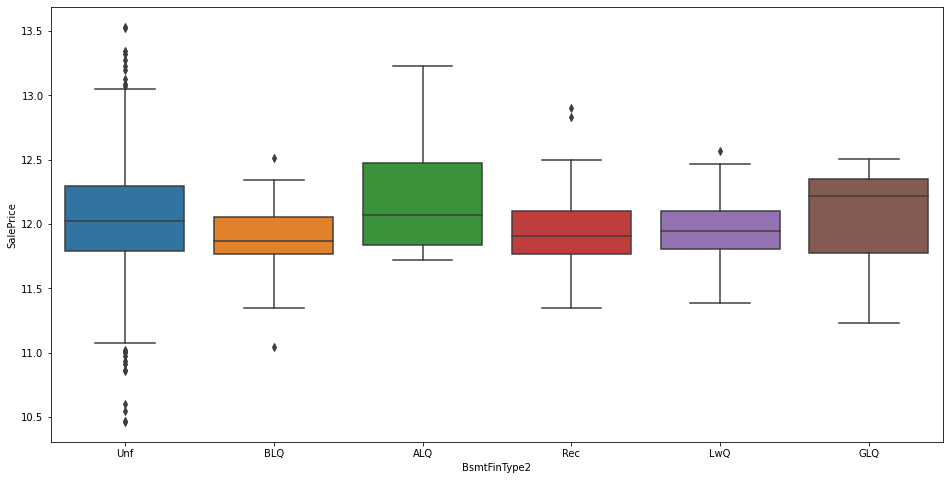

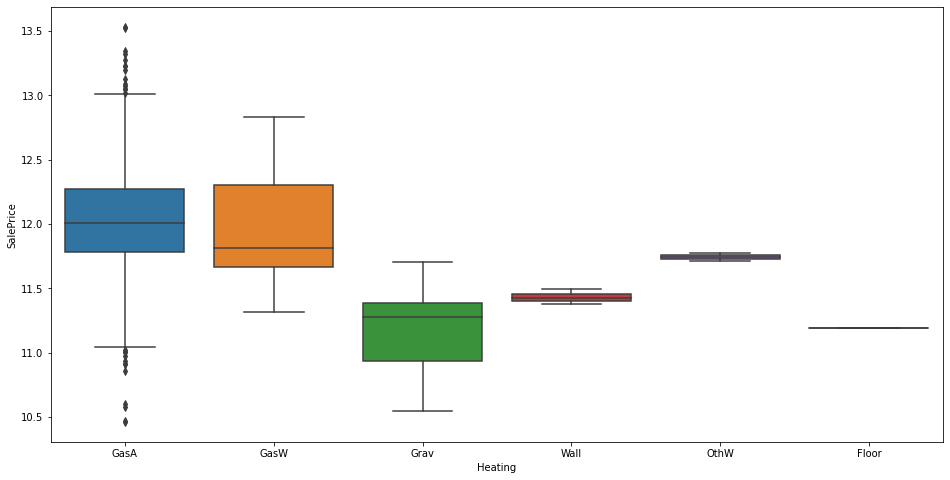

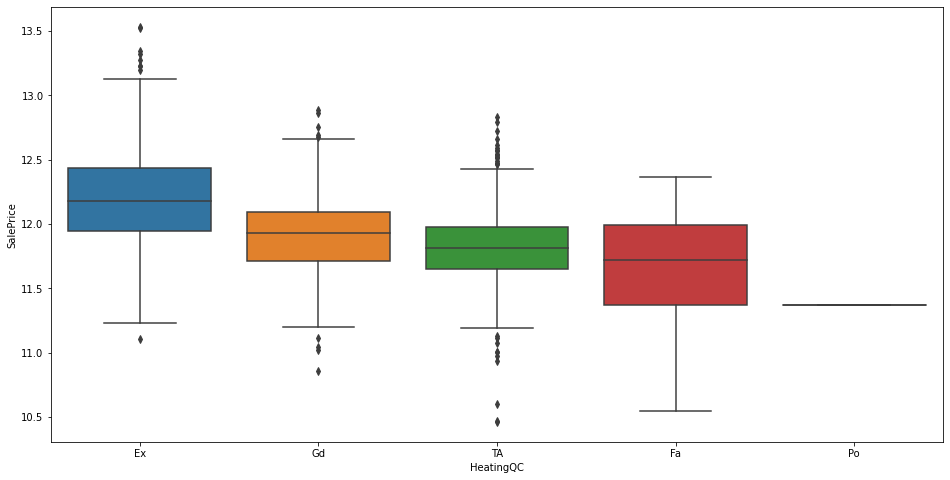

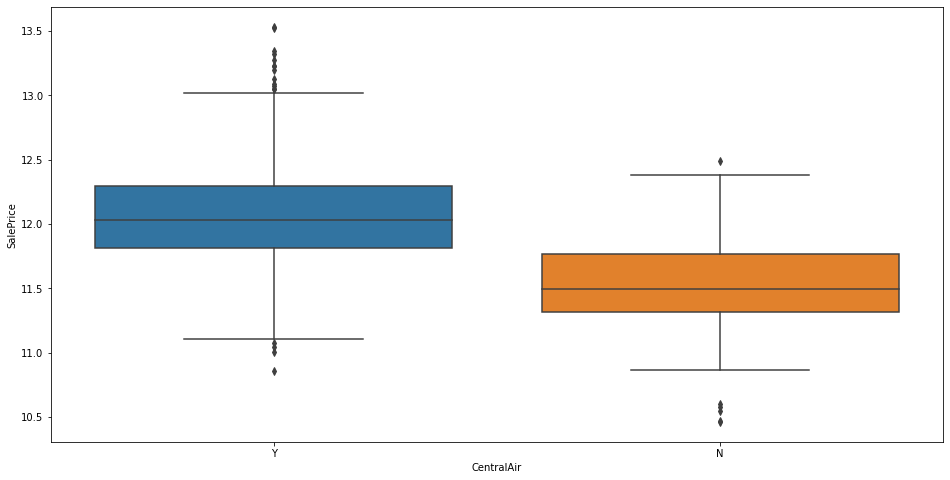

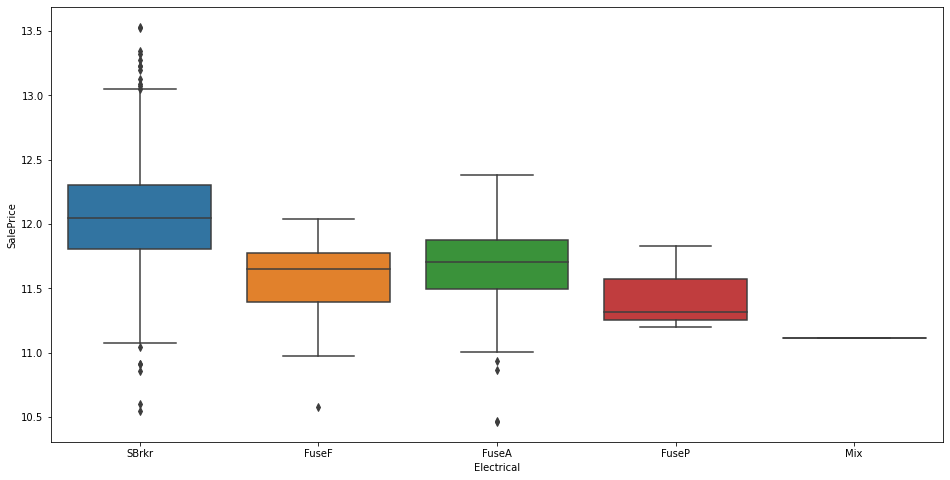

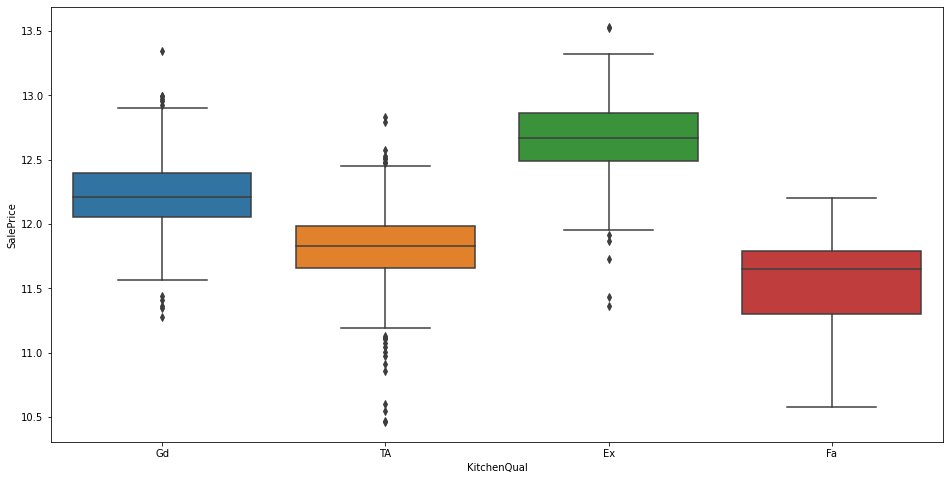

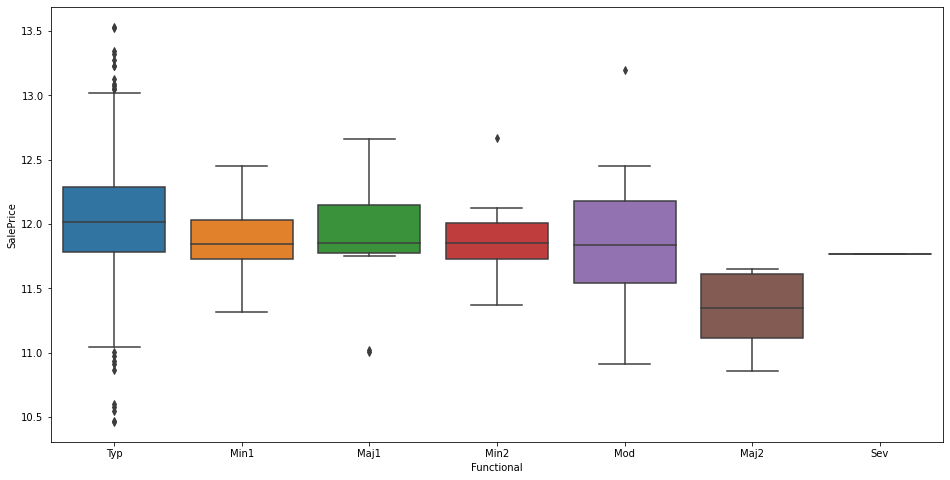

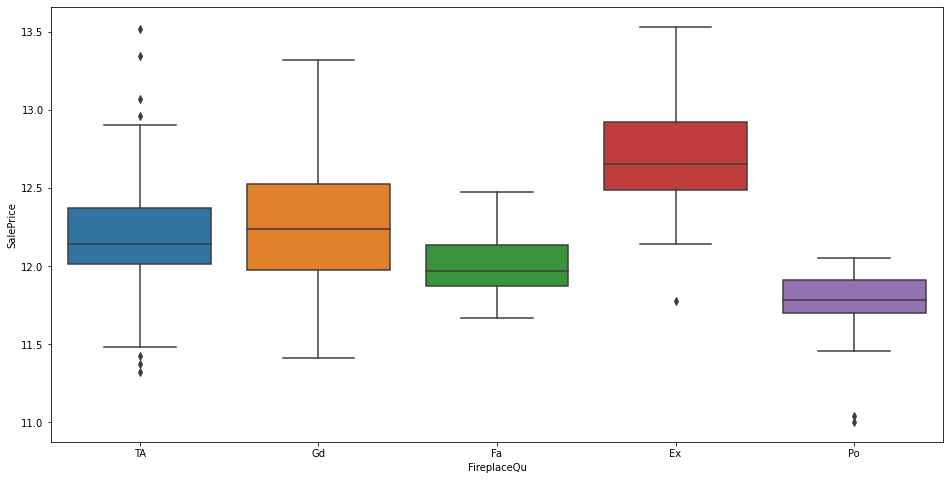

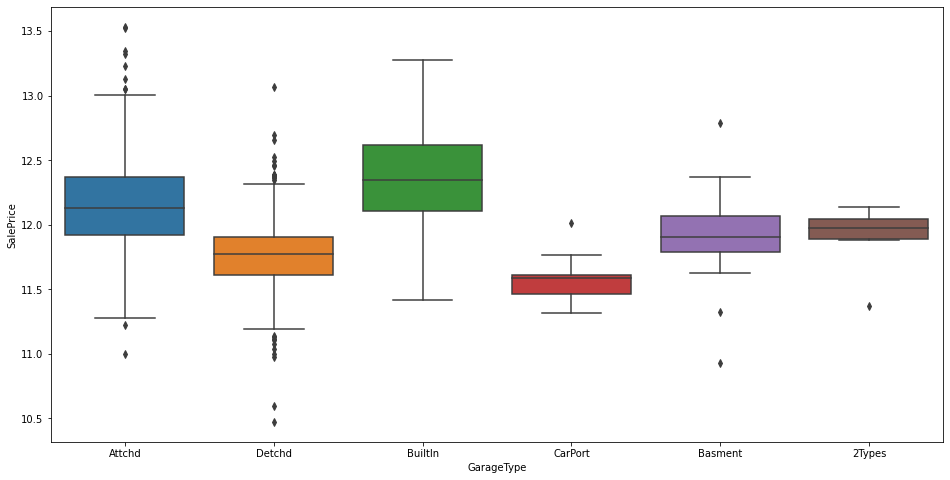

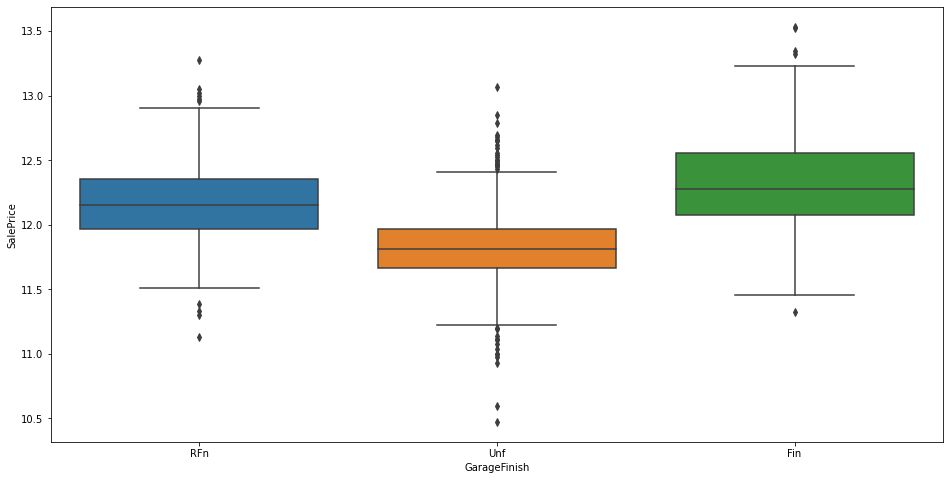

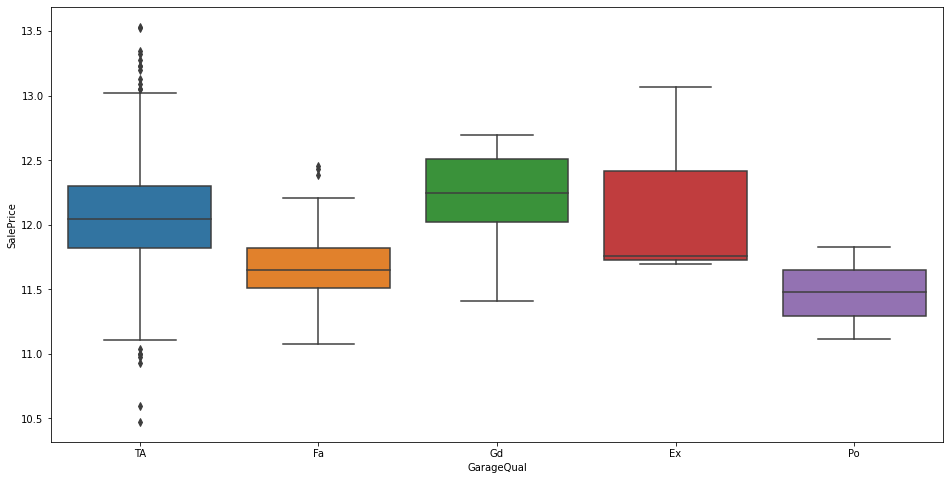

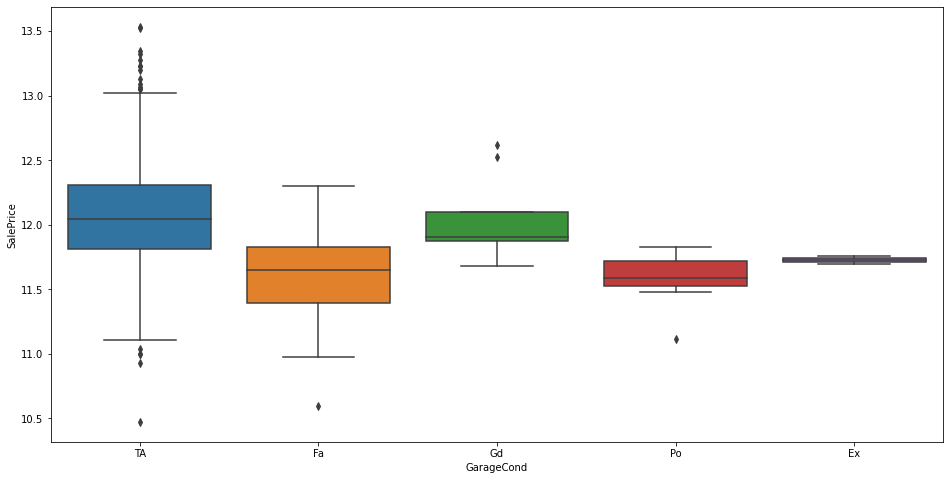

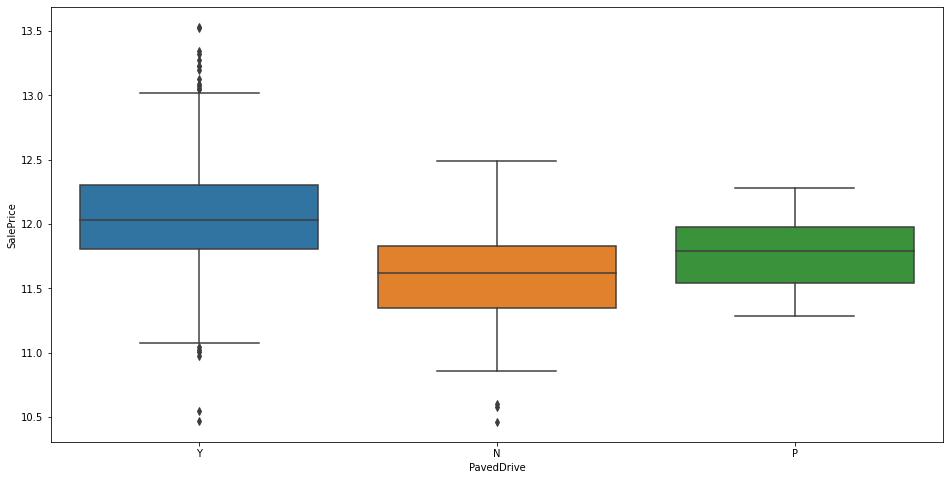

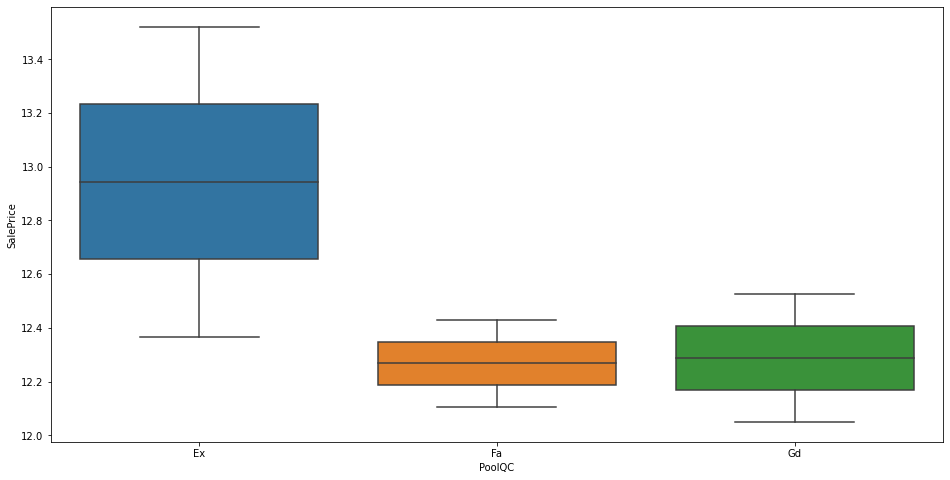

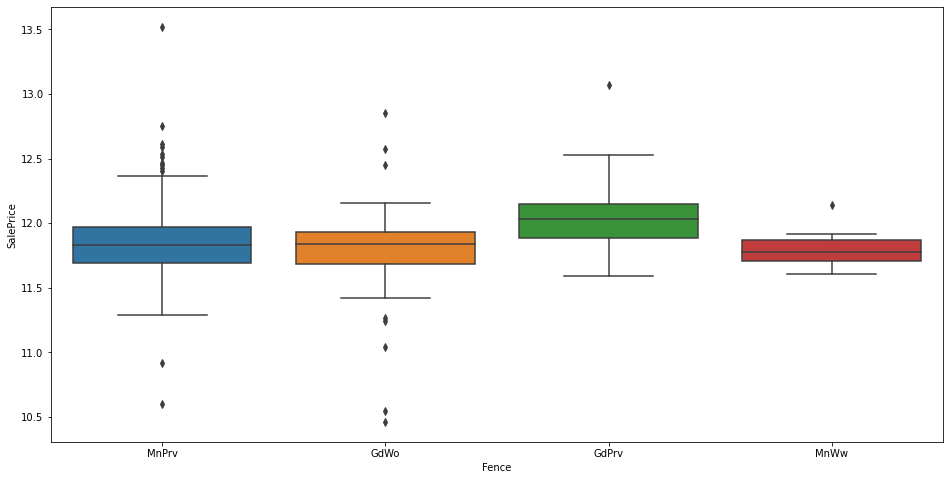

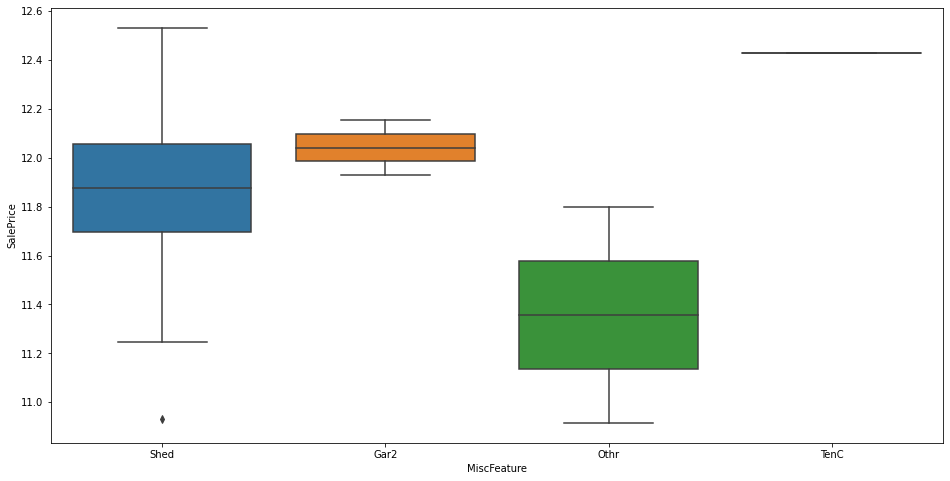

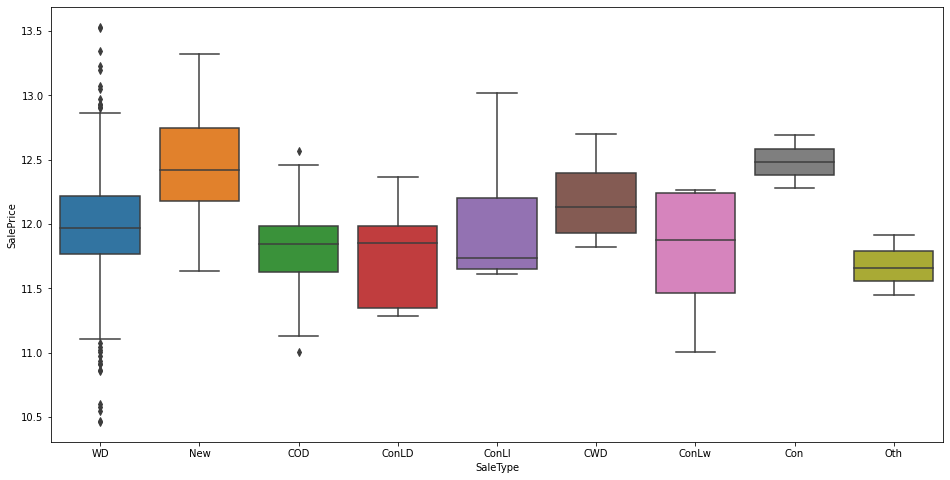

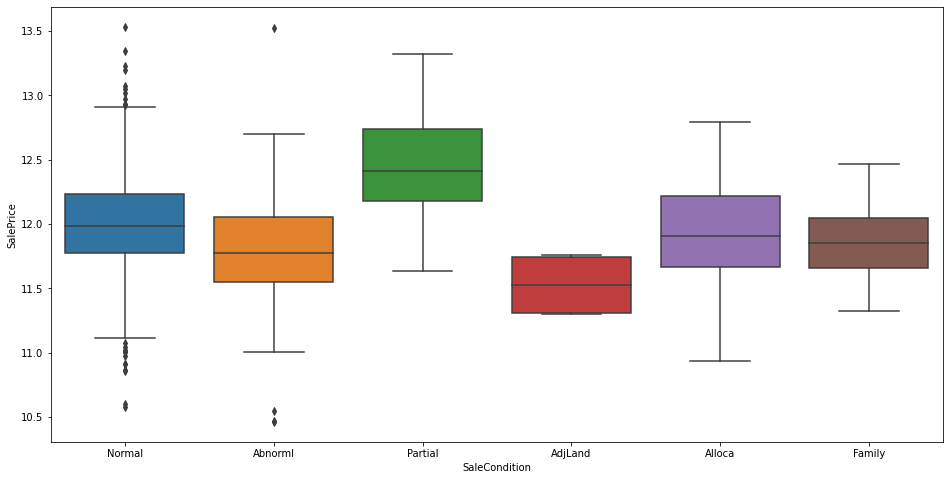

In [ ]:
categorical_features_train=dfTrain.select_dtypes(include = ["object"])#only including object datatype which will remove int and float types.
for col in categorical_features_train:
  plt.figure(figsize=(16,8))
  sns.boxplot(x=col,y='SalePrice',data=dfTrain) 

In [ ]:
ntrain = dfTrain.shape[0]
ntest = dfTrain.shape[0]
target_variable = dfTrain.SalePrice.values#Saving it in a seprate df so that i can delete it from the actual one
combined_data = pd.concat((dfTrain, dfTest)).reset_index(drop=True)#Concatining the train and test file so that i don't have to process both files seperately
combined_data.drop(['SalePrice'], axis=1, inplace=True)
combined_data.shape

(2917, 79)

In [ ]:
total_na = (combined_data.isnull().sum() / len(combined_data)) * 100
total_na = total_na.drop(total_na[total_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :total_na})
missing_data


,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageYrBlt,5.450806
GarageQual,5.450806
GarageCond,5.450806


Text(0.5, 1.0, 'Percent missing data by feature')

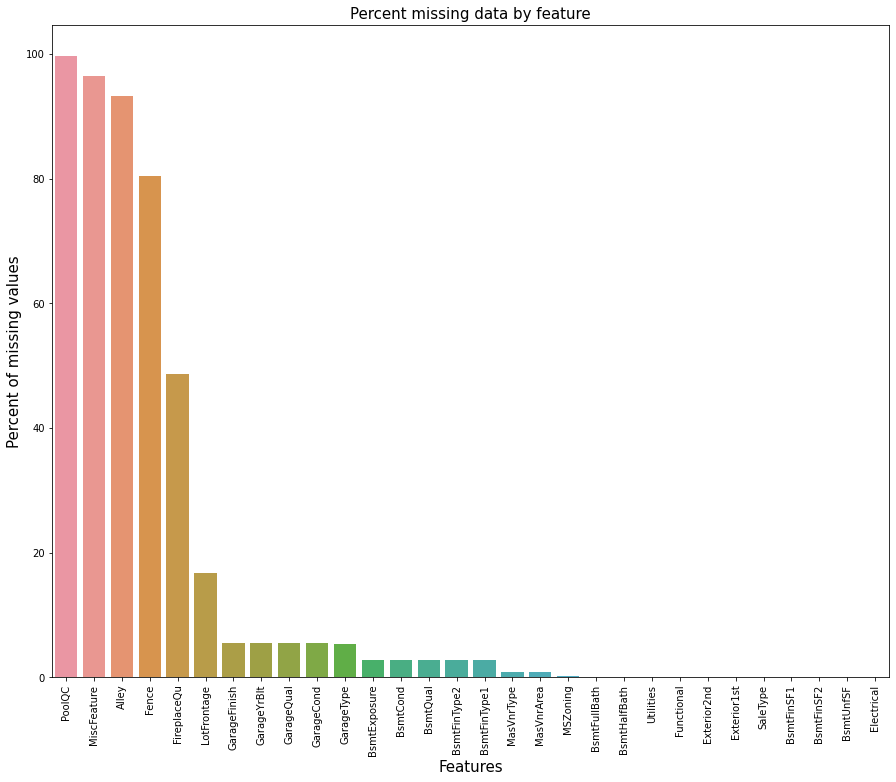

In [ ]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=total_na.index, y=total_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

### In the discription they have mentioned all the features with all the categorices they have. In some of them, Nan does not represent missing data but it tells that the house soes not have that feature. Here is list of all such features

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       NA	No Basement

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement


FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
  
GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
  
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		

## Filling up these values with the meaning given in description file.

In [ ]:
combined_data["Alley"] = combined_data["Alley"].fillna("No alley access")
combined_data["MasVnrType"] = combined_data["MasVnrType"].fillna("None")
combined_data["MasVnrArea"] = combined_data["MasVnrArea"].fillna(0)
combined_data["BsmtQual"] = combined_data["BsmtQual"].fillna("None")
combined_data["BsmtCond"] = combined_data["BsmtCond"].fillna("Nones")
combined_data["BsmtExposure"] = combined_data["BsmtExposure"].fillna("None")
combined_data["BsmtFinType1"] = combined_data["BsmtFinType1"].fillna("None")
combined_data["BsmtFinType2"] = combined_data["BsmtFinType2"].fillna("None")
combined_data["FireplaceQu"] = combined_data["FireplaceQu"].fillna("No Fireplace")
combined_data["Fence"] = combined_data["Fence"].fillna("None")
combined_data["BsmtFinSF1"] = combined_data["BsmtFinSF1"].fillna(0)
combined_data["BsmtFinSF2"] = combined_data["BsmtFinSF2"].fillna(0)
combined_data["BsmtUnfSF"] = combined_data["BsmtUnfSF"].fillna(0)
combined_data["TotalBsmtSF"] = combined_data["TotalBsmtSF"].fillna(0)
combined_data["BsmtFullBath"] = combined_data["BsmtFullBath"].fillna(0)
combined_data["BsmtHalfBath"] = combined_data["BsmtHalfBath"].fillna(0)
combined_data["Functional"] = combined_data["Functional"].fillna("Typ")
combined_data["MSSubClass"] = combined_data["MSSubClass"].fillna("None")
combined_data["PoolQC"] = combined_data["PoolQC"].fillna("None")
combined_data["MiscFeature"] = combined_data["MiscFeature"].fillna("None")
combined_data["GarageYrBlt"] = combined_data["GarageYrBlt"].fillna(0)
combined_data["GarageArea"] = combined_data["GarageArea"].fillna(0)
combined_data["GarageYrBlt"] = combined_data["GarageYrBlt"].fillna(0)
combined_data["GarageCars"] = combined_data["GarageCars"].fillna(0)
combined_data["GarageYrBlt"] = combined_data["GarageYrBlt"].fillna(0)
combined_data["GarageType"] = combined_data["GarageType"].fillna("None")
combined_data["GarageFinish"] = combined_data["GarageFinish"].fillna("None")
combined_data["GarageQual"] = combined_data["GarageQual"].fillna("None")
combined_data["GarageCond"] = combined_data["GarageCond"].fillna("None")

In [ ]:
#For the rest I will fill up numerical features with median and categorical with mode
total_na = (combined_data.isnull().sum() / len(combined_data)) * 100
total_na = total_na.drop(total_na[total_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :total_na})
missing_data


,Missing Ratio
LotFrontage,16.660953
MSZoning,0.137127
Utilities,0.068564
SaleType,0.034282
KitchenQual,0.034282
Electrical,0.034282
Exterior2nd,0.034282
Exterior1st,0.034282


In [ ]:
combined_data["LotFrontage"] = combined_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [ ]:
combined_data['MSZoning'] = combined_data['MSZoning'].fillna(combined_data['MSZoning'].mode()[0])
combined_data['Electrical'] = combined_data['Electrical'].fillna(combined_data['Electrical'].mode()[0])
combined_data['KitchenQual'] = combined_data['KitchenQual'].fillna(combined_data['KitchenQual'].mode()[0])
combined_data['Exterior1st'] = combined_data['Exterior1st'].fillna(combined_data['Exterior1st'].mode()[0])
combined_data['Exterior2nd'] = combined_data['Exterior2nd'].fillna(combined_data['Exterior2nd'].mode()[0])
combined_data['SaleType'] = combined_data['SaleType'].fillna(combined_data['SaleType'].mode()[0])

In [ ]:
total_na = (combined_data.isnull().sum() / len(combined_data)) * 100
total_na = total_na.drop(total_na[total_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :total_na})
missing_data


,Missing Ratio
Utilities,0.068564


In [ ]:
combined_data = combined_data.drop(['Utilities'], axis=1)#Removing utilites which is not usefull for prediction as it onlt has one category

Some features which are actual categorial are there as numerical so converting them to categorical

In [ ]:
combined_data['MSSubClass'] = combined_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
combined_data['OverallCond'] = combined_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
combined_data['YrSold'] = combined_data['YrSold'].astype(str)
combined_data['MoSold'] = combined_data['MoSold'].astype(str)
#combined_data['MSZoning'] = combined_data['MSZoning'].apply(str)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(combined_data[c].values)) 
    combined_data[c] = lbl.transform(list(combined_data[c].values))

# shape        
combined_data.shape

(2917, 78)

In [ ]:
combined_data['TotalSF'] = combined_data['TotalBsmtSF'] + combined_data['1stFlrSF'] + combined_data['2ndFlrSF']


In [ ]:
numeric_feats = combined_data.dtypes[combined_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = combined_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [ ]:
skewness = skewness[abs(skewness) > 0.75]#Checking the skewness for rest of the data as we need to make sure that their distribution is normal for Linear Regression
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    combined_data[feat] = boxcox1p(combined_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


In [ ]:
combined_data = pd.get_dummies(combined_data)
combined_data.shape

(2917, 220)

In [ ]:
dfTrain = combined_data[:ntrain]
dfTest = combined_data[ntrain:]

In [ ]:
y_origional = y_origional.drop(columns=['Id'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dfTrain
y = target_variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=.33)#Spliting the train data for testing the model on training data

### Model-1 This is the simple Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()

In [ ]:
model_linear.fit(X_train,y_train)
print(model_linear)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
y_predicted = model_linear.predict(X_test)

In [ ]:
y_predicted

array([12.20038726, 12.14296508, 11.51216517, 12.56958121, 12.01122284,
       11.92718123, 12.21773652, 11.75394236, 11.54702969, 12.05471656,
       11.29881524, 11.57019212, 12.19569559, 11.89806198, 11.72478629,
       10.80634566, 11.55201914, 11.71561367, 12.10953321, 12.07625207,
       11.8373752 , 11.82861286, 11.95202839, 12.73699337, 12.48829668,
       12.08042552, 11.60804279, 11.87390892, 11.95865018, 11.33062283,
       12.4016517 , 11.83167647, 12.09151533, 12.33131011, 12.11182867,
       12.35846003, 12.19115405, 12.6433975 , 11.50882114, 11.62413832,
       11.78023892, 11.66048401, 11.97818405, 11.70531355, 12.20308503,
       11.3605864 , 13.04210168, 11.7289375 , 11.89365859, 12.17414236,
       11.95600268, 11.74491331, 11.43521428, 11.76396958, 12.32238073,
       11.81153969, 11.87690127, 13.0106393 , 12.35112404, 11.86082023,
       11.29875481, 11.80938706, 12.07843733, 12.17794852, 11.84975338,
       12.5006052 , 11.91256838, 11.66153988, 11.76734562, 11.98

In [ ]:
MAE_LR = metrics.mean_absolute_error(y_test, y_predicted)
MSE_LR = metrics.mean_squared_error(y_test, y_predicted)
RMSE_LR = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
R2_LR = metrics.r2_score(y_test, y_predicted)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))
print('R2 Score',metrics.r2_score(y_test, y_predicted))

MAE: 0.08554134749310179
MSE: 0.01732536368587895
RMSE: 0.1316258473320455
R2 Score 0.8942735273814909


In [ ]:
results = pd.DataFrame(data=[["Linear Regression", R2_LR, MAE_LR,MSE_LR,RMSE_LR]], 
                          columns=['Model', 'R2 SCORE', 'MAE','MSE','RMSE'])
results

,Model,R2 SCORE,MAE,MSE,RMSE
0,Linear Regression,0.894274,0.085541,0.017325,0.131626


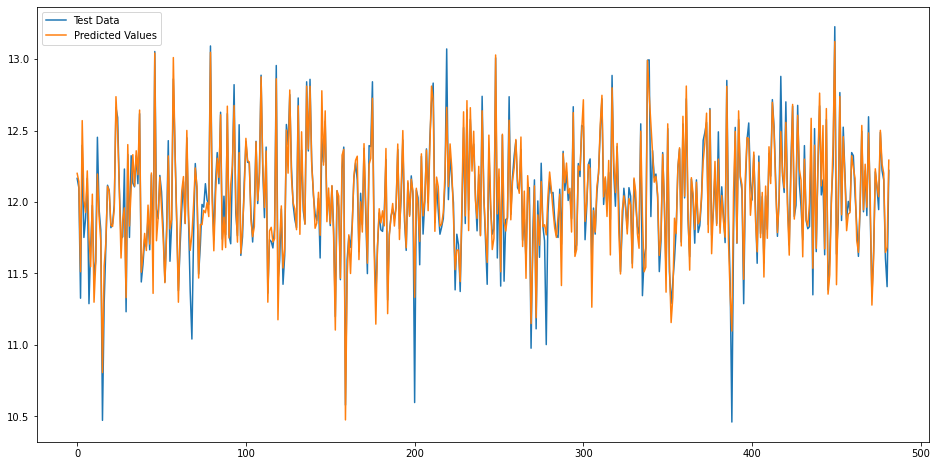

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, label ='Test Data')
plt.plot(y_predicted, label = 'Predicted Values')
plt.legend()
plt.show()


## Model 2 with Random Forest Regressor

In [ ]:
from sklearn.svm import SVR

In [ ]:
np.random.seed(11111)
rf_imp=RandomForestRegressor(n_estimators=1200, max_depth=None)

In [ ]:

rf_imp.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred = rf_imp.predict(X_test)

In [ ]:
y_pred

array([12.15391003, 12.16387513, 11.49373122, 12.45265566, 11.8631078 ,
       11.9204153 , 12.22781277, 11.7196928 , 11.4689519 , 12.00468675,
       11.28584995, 11.74424853, 12.18002335, 11.85557982, 11.7590869 ,
       11.25501515, 11.6502251 , 11.77679668, 12.1995003 , 12.09191361,
       11.85950966, 11.84535116, 12.01941941, 12.69037   , 12.43223371,
       12.14683221, 11.55843896, 11.75253231, 12.02971834, 11.35253382,
       12.45379751, 11.67004925, 11.98070311, 12.25915823, 12.09717362,
       12.29568554, 12.05800393, 12.6893137 , 11.73832696, 11.72458139,
       11.78919219, 11.73522887, 12.06383656, 11.70855396, 12.20159212,
       11.40313595, 13.01014101, 11.7259154 , 11.61944279, 12.15913452,
       11.94314077, 11.8230839 , 11.47045727, 11.84206719, 12.29893071,
       11.82835955, 11.85271138, 12.95082833, 12.44067004, 11.99615576,
       11.36468673, 11.88527077, 11.96150357, 12.16679101, 11.88176374,
       12.45718925, 11.89732487, 11.71286998, 11.71674571, 11.99

In [ ]:
MAE_RF = metrics.mean_absolute_error(y_test, y_pred)
MSE_RF = metrics.mean_squared_error(y_test, y_pred)
RMSE_RF = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2_RF = metrics.r2_score(y_test, y_pred)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score',metrics.r2_score(y_test, y_pred))

MAE: 0.0966212413462954
MSE: 0.0225659288993351
RMSE: 0.1502196022472936
R2 Score 0.8622934498147743


In [ ]:
result2 = pd.DataFrame(data=[["Random Forest Regressor", R2_RF, MAE_RF,MSE_RF,RMSE_RF]], 
                          columns=['Model', 'R2 SCORE', 'MAE','MSE','RMSE'])
results = results.append(result2, ignore_index=True)
results

,Model,R2 SCORE,MAE,MSE,RMSE
0,Linear Regression,0.894274,0.085541,0.017325,0.131626
1,XGBoost,0.890856,0.085708,0.017885,0.133736
2,Random Forest Regressor,0.862293,0.096621,0.022566,0.150220


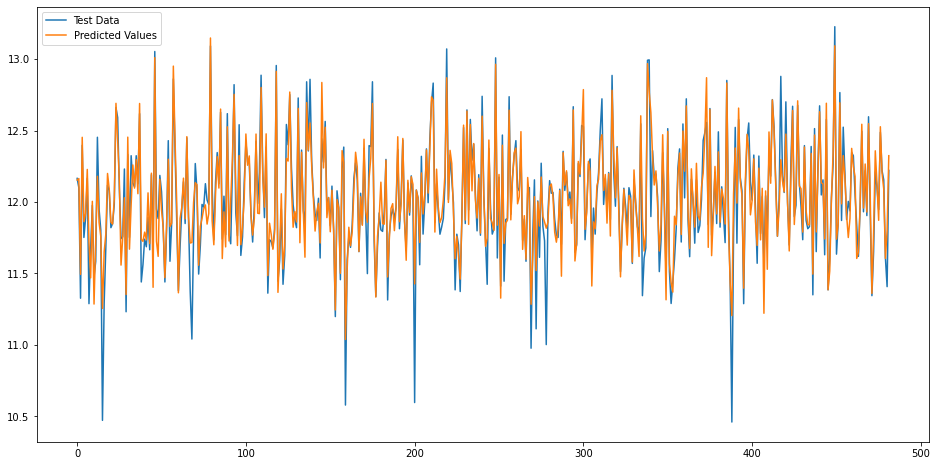

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test, label ='Test Data')
plt.plot(y_pred, label = 'Predicted Values')
plt.legend()
plt.show()

### Model 3 is with XGBoost Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb =XGBRegressor( booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, n_estimators=2400,
             n_jobs=1, nthread=None, objective='reg:linear',
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, 
             silent=None, subsample=0.8, verbosity=1)


In [ ]:
xgb.fit(X_train, y_train)

[01:53:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, missing=None, n_estimators=2400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [ ]:
y_predict = xgb.predict(X_test)

In [ ]:
y_predict

array([12.191621 , 12.182058 , 11.492954 , 12.42724  , 11.920079 ,
       11.906592 , 12.17704  , 11.658959 , 11.507028 , 12.009444 ,
       11.319248 , 11.497602 , 12.208873 , 11.870167 , 11.763827 ,
       11.123334 , 11.612287 , 11.792717 , 12.139109 , 12.084629 ,
       11.856293 , 11.839216 , 12.021548 , 12.768606 , 12.475505 ,
       12.130931 , 11.60948  , 11.816172 , 11.978258 , 11.304984 ,
       12.4418745, 11.687642 , 12.035343 , 12.25006  , 12.079579 ,
       12.309242 , 12.114396 , 12.667038 , 11.597778 , 11.60796  ,
       11.769866 , 11.765181 , 12.026805 , 11.756495 , 12.164153 ,
       11.398374 , 12.978414 , 11.772411 , 11.689753 , 12.165514 ,
       11.922413 , 11.839788 , 11.502154 , 11.775785 , 12.348861 ,
       11.8418   , 11.820843 , 12.999748 , 12.433901 , 11.884577 ,
       11.3366585, 11.868276 , 11.979995 , 12.167876 , 11.888499 ,
       12.506323 , 11.880891 , 11.596542 , 11.740734 , 11.8568535,
       12.211695 , 12.124002 , 11.540784 , 11.8709755, 11.8415

In [ ]:
MAE_XG = metrics.mean_absolute_error(y_test, y_predict)
MSE_XG = metrics.mean_squared_error(y_test, y_predict)
RMSE_XG = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
R2_XG = metrics.r2_score(y_test, y_predict)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))
print('R2 Score',metrics.r2_score(y_test, y_predict))

MAE: 0.08570793392182495
MSE: 0.017885407745068457
RMSE: 0.13373633666684778
R2 Score 0.8908559089139884


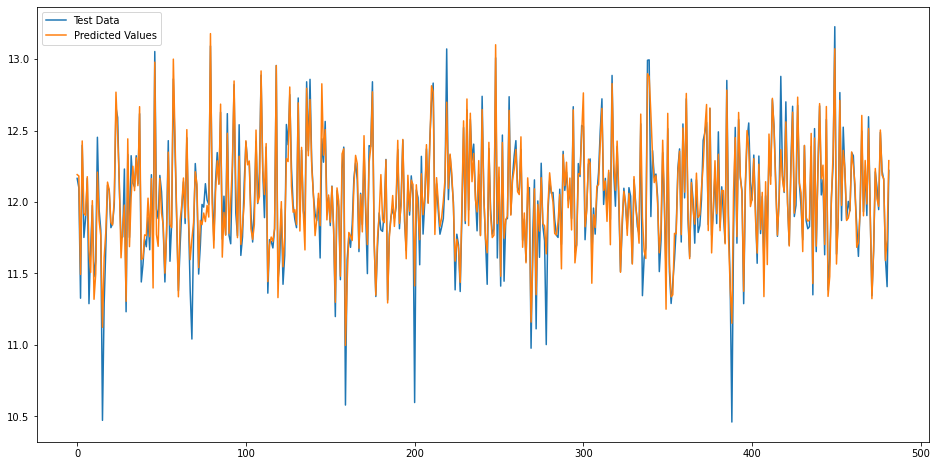

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test Data')
plt.plot(y_predict, label = 'Predicted Values')
plt.legend()
plt.show()

### By far the best result is from XGBoost model.


Below is performance evaluation metrix

In [ ]:

result3 = pd.DataFrame(data=[["XGBoost", R2_XG, MAE_XG,MSE_XG,RMSE_XG]], 
                          columns=['Model', 'R2 SCORE', 'MAE','MSE','RMSE'])
results = results.append(result3, ignore_index=True)
results

,Model,R2 SCORE,MAE,MSE,RMSE
0,Linear Regression,0.894274,0.085541,0.017325,0.131626
1,XGBoost,0.890856,0.085708,0.017885,0.133736
2,Random Forest Regressor,0.862293,0.096621,0.022566,0.150220
3,XGBoost,0.890856,0.085708,0.017885,0.133736
4,XGBoost,0.890856,0.085708,0.017885,0.133736


### I have selected model 3 which is using XGBoost for testting it on the given test file and will submit the result generated from it

In [ ]:
y_origional

,SalePrice
0,169277.052498
1,187758.393989
2,183583.683570
3,179317.477511
4,150730.079977
...,...
1454,167081.220949
1455,164788.778231
1456,219222.423400
1457,184924.279659


In [ ]:
y_origional = y_origional['SalePrice']

In [ ]:
y_train = target_variable
x_train = dfTrain.copy()
x_test = dfTest.copy()


In [ ]:
xgb.fit(x_train, y_train)

[01:55:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, missing=None, n_estimators=2400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0.6, reg_lambda=0.6, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.8, verbosity=1)

In [ ]:
y_predict = xgb.predict(x_test)

In [ ]:
y_predict = np.exp(y_predict)

In [ ]:
y_o = pd.read_csv('drive/MyDrive/dafinal/sample_submission.csv')#Given submission file

In [ ]:
arr = np.array(y_predict)

submission = pd.DataFrame({'Id':y_o.index, 'SalePrice': arr})# Creating dataframe of the predicted values
submission

,Id,SalePrice
0,0,120758.226562
1,1,161609.937500
2,2,188476.484375
3,3,194931.906250
4,4,188411.421875
...,...,...
1454,1454,79849.054688
1455,1455,86048.148438
1456,1456,161792.359375
1457,1457,119073.382812


In [ ]:
submission.to_csv("Submission.csv",index=False)# Creating CSV file for submission